<a href="https://colab.research.google.com/github/AlexandrePardelinha/Computer-Science-Masters/blob/main/SOCS_Amazonia_artigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import scale
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SOCStotal = pd.read_excel("/content/drive/My Drive/Dissertacao/SOCS_total.xlsx")
SOCSAmazonia = pd.read_excel("/content/drive/My Drive/Dissertacao/SOCS_Amazonia_Urucu.xlsx")

In [ ]:
SOCSAmazonia.head() #Dados da amazônia - Bacia do Urucu

,SOCS,DS,sand,silt,clay,Ph,SB,Al,H,SOC,Espessura
0,1.18680,0.92,439,434,127,36,25.2,47.0,124.0,21.5,0.06
1,2.35092,1.37,370,470,164,43,18.2,25.0,60.0,7.8,0.22
2,2.19775,1.49,318,331,345,48,16.1,43.0,17.0,5.9,0.25
3,2.26233,1.47,280,320,401,53,10.0,50.0,21.0,5.7,0.27
4,1.67994,0.61,260,422,319,37,30.2,52.5,168.5,30.6,0.09


In [ ]:
SOCStotal.head() #excluído a variável de classificação Target

,SOCS,DS,sand,silt,clay,Ph,SB,Al,H,SOC,Espessura
0,1.689210,0.90,110,70.0,820.0,54.0,1.0,1.0,49.0,13.7,0.137
1,0.737100,0.91,110,60.0,830.0,57.0,1.0,0.0,30.0,9.0,0.090
2,0.474281,0.89,100,120.0,780.0,57.0,1.0,0.0,18.0,7.3,0.073
3,0.298800,0.83,110,80.0,810.0,59.0,1.0,0.0,13.0,6.0,0.060
4,0.187425,1.53,840,10.0,150.0,46.0,1.0,2.0,18.0,3.5,0.035


In [ ]:
SOCSAmazonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SOCS       479 non-null    float64
 1   DS         479 non-null    float64
 2   sand       479 non-null    int64  
 3   silt       479 non-null    int64  
 4   clay       479 non-null    int64  
 5   Ph         479 non-null    int64  
 6   SB         479 non-null    float64
 7   Al         479 non-null    float64
 8   H          479 non-null    float64
 9   SOC        479 non-null    float64
 10  Espessura  479 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 41.3 KB


**SELEÇÃO DE ATRIBUTOS (Feature Selection)**

Quando trabalhamos com um conjunto de dados, podemos extrair diversos atributos dos mesmos. No contexto da ciência de dados, um atributo consiste em uma propriedade ou característica da entidade que está sendo analisada.

Por exemplo, diante de um conjunto de dados relacionados ao estoque de carbono orgânico no solo, podemos encontrar atributos como densidade aparente do solo, espessura do solo, concentração de carbono orgânico no solo, ph da água no solo...

A seleção de atributos, ou Feature Selection, consiste na obtenção de um subconjunto de dados a partir de um conjunto original, visando extrair conhecimento dos dados e, ao mesmo tempo, reduzir a complexidade e a dimensionalidade do problema.


A seleção de atributos é uma das etapas mais importantes do pré-processamento de dados e tem o objetivo de preparar os dados antes de serem aplicados em modelos de Machine Learning.

Seleção de Atributos foca primariamente em remover preditores redundantes ou não-informativos do modelo.

Em projetos de Machine Learning, busca-se tirar conclusões a partir de uma base de dados para auxiliar no processo de tomada de decisão. Para tal propósito, são traçados alguns objetivos como: agrupar, identificar padrões ou projetar valores futuros. Por meio da seleção de atributos, esses objetivos podem ser alcançados de maneira acelerada e otimizada.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

**FEATURES SELECTION - CORRELAÇÃO DE PEARSON (baseada em filtro)**

Trata-se de uma das técnicas mais populares, em que todo o processo é realizado previamente, o que demanda baixo custo computacional. A seleção por filtro utiliza métricas estatísticas para avaliar a relevância dos atributos com a variável de interesse.

Dessa forma, são selecionadas aquelas que apresentam maior grau de correlação ou dependência. Algumas métricas comumente utilizadas na avaliação são o teste qui-quadrado (variáveis categóricas), a correlação de Pearson (variáveis numéricas).

Quanto mais próximo de 1 for o módulo do coeficiente de Pearson, mais fortemente correlacionadas estão as variáveis. Todavia, quanto mais próximo de 0, mais fracamente correlacionados linearmente estão os atributos.

Se uma variável tende a aumentar quando a outra aumenta, dizemos que a
correlação é positiva. Por outro lado, se uma variável tende a diminuir quando a outra aumenta, dizemos que a correlação é negativa. Já uma correlação igual a zero indica que uma variação em uma das variáveis (aumento ou diminuição) não influencia a outra.

A correlação foi calculada considerando somente os dados da Amazônia - Bacia do urucu.

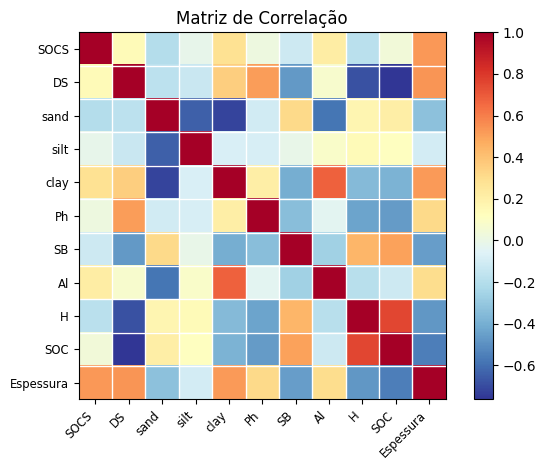

In [ ]:
correlacao = SOCSAmazonia.corr()
#plotar correlação
sm.graphics.plot_corr(correlacao, xnames=correlacao.columns)
plt.title("Matriz de Correlação")
plt.show()

Maiores Correlações:

**AZUL ESCURO: CLAY X SAND / SOC X DS**

**AZUL MÉDIO: DS X H / SILT X SAND**

**LARANJA MÉDIO: SOCS X Espessura / DS X Espessura / DS X Ph**

**LARANJA ESCURO: H X SOC**

In [ ]:
correlacao

,SOCS,DS,sand,silt,clay,Ph,SB,Al,H,SOC,Espessura
SOCS,1.000000,0.141658,-0.205174,-0.015289,0.281046,0.021093,-0.120637,0.216889,-0.184446,0.039866,0.531570
DS,0.141658,1.000000,-0.177498,-0.134730,0.353563,0.512979,-0.472428,0.070451,-0.684668,-0.763243,0.535401
sand,-0.205174,-0.177498,1.000000,-0.642084,-0.716189,-0.103788,0.316011,-0.582277,0.171922,0.212298,-0.327566
silt,-0.015289,-0.134730,-0.642084,1.000000,-0.075162,-0.087227,-0.011741,0.086544,0.142578,0.117570,-0.100637
clay,0.281046,0.353563,-0.716189,-0.075162,1.000000,0.214368,-0.400301,0.678433,-0.353291,-0.383211,0.517872
Ph,0.021093,0.512979,-0.103788,-0.087227,0.214368,1.000000,-0.339582,-0.037589,-0.436632,-0.461689,0.316074
SB,-0.120637,-0.472428,0.316011,-0.011741,-0.400301,-0.339582,1.000000,-0.262671,0.437423,0.500925,-0.457212
Al,0.216889,0.070451,-0.582277,0.086544,0.678433,-0.037589,-0.262671,1.000000,-0.188689,-0.116251,0.298716
H,-0.184446,-0.684668,0.171922,0.142578,-0.353291,-0.436632,0.437423,-0.188689,1.000000,0.752138,-0.478869
SOC,0.039866,-0.763243,0.212298,0.117570,-0.383211,-0.461689,0.500925,-0.116251,0.752138,1.000000,-0.551339


In [ ]:
Pearson = correlacao.sort_values(by='SOCS')

In [ ]:
Pearson.SOCS

,SOCS
sand,-0.205174
H,-0.184446
SB,-0.120637
silt,-0.015289
Ph,0.021093
SOC,0.039866
DS,0.141658
Al,0.216889
clay,0.281046
Espessura,0.531570


In [ ]:
Valor_absoluto_Pearson = abs(Pearson.SOCS)

In [ ]:
Valor_absoluto_Pearson

,SOCS
sand,0.205174
H,0.184446
SB,0.120637
silt,0.015289
Ph,0.021093
SOC,0.039866
DS,0.141658
Al,0.216889
clay,0.281046
Espessura,0.531570


In [ ]:
Ordem_cresc_Pearson = Valor_absoluto_Pearson.sort_values

In [ ]:
Ordem_cresc_Pearson() #Ordem crescente correlação de Pearson com a variável SOCS, em valor absoluto (módulo).

,SOCS
silt,0.015289
Ph,0.021093
SOC,0.039866
SB,0.120637
DS,0.141658
H,0.184446
sand,0.205174
Al,0.216889
clay,0.281046
Espessura,0.531570


Avaliando a correlação linear dos atributos com a variável SOCS percebe-se que os atributos SOC, Espessura, H e DS apresentam maior correlação linear com a variável de interesse. São os atributos mais dependentes da variável SOCS, influenciando em uma possível previsão (sendo, desta forma, mais relevantes para a criação de um eventual modelo preditivo).

**AVALIAÇÃO DE HIPERPARÂMETRO**

Ao treinar modelos de machine learning, os conjuntos de dados e os modelos precisam de conjuntos diferentes de hiperparâmetros, que são um tipo de variável. A única maneira de determiná-los é por meio de vários experimentos, em que você escolhe um conjunto de hiperparâmetros e os executa em seu modelo. Isso é chamado de ajuste de hiperparâmetros. Em essência, você está treinando seu modelo sequencialmente com diferentes conjuntos de hiperparâmetros. Esse processo pode ser manual ou você pode escolher um dos vários métodos automatizados de ajuste de hiperparâmetros.

Selecionar o conjunto adequado de hiperparâmetros é importante em termos de performance e precisão do modelo. Infelizmente, não há regras definidas sobre quais hiperparâmetros funcionam melhor nem seus valores ideais ou padrão. Você precisa testar para encontrar o conjunto de hiperparâmetros ideal.

Os hiperparâmetros controlam diretamente a estrutura, a função e a performance do modelo. O ajuste de hiperparâmetro permite que os cientistas de dados ajustem o desempenho do modelo para resultados ideais. Esse processo é uma parte essencial da machine learning, e a escolha de valores de hiperparâmetros apropriados é crucial para o sucesso.

O processo de ajuste de hiperparâmetros é iterativo, e você experimenta diferentes combinações de parâmetros e valores. Geralmente, você começa definindo uma variável de destino, como precisão, como a métrica principal e pretende maximizar ou minimizar essa variável. Recomenda-se usar técnicas de validação cruzada, para que seu modelo não fique centrado em uma única parte de seus dados.

Através dos resultados das seleções de atributos, decidimos pela extração do atributo Al (acidez provocada pela hidrólise do alumínio) pois não é relevante para a criação de um eventual modelo preditivo.

A avaliação de Hiperparâmetro foi feita somente nos dados da Amazônia - Urucu para fins de comparacão de um artigo que também usou a Amazônia.

**Random Search**

Ao contrário da busca em grade, a pesquisa aleatória seleciona combinações de hiperparâmetros de forma aleatória. Essa abordagem tem a vantagem de explorar uma variedade maior de hiperparâmetros em um curto espaço de tempo.
A pesquisa aleatória pode ser mais eficiente do que a busca em grade quando há um número excessivo de combinações possíveis de hiperparâmetros. No entanto, em alguns casos, pode não explorar todas as combinações possíveis de forma adequada.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
y_rs = SOCSAmazonia['SOCS']
X_rs = SOCSAmazonia.iloc[ :, [1,2,4,5,6,7,8,9,10]].values #excluído o 3 (silt)
X_train_rs, X_test_rs, y_train_rs, y_test_rs  = train_test_split(X_rs, y_rs, random_state = 0)

In [ ]:
space = dict()

**Raiz Do Erro Quadrático Médio - RMSE CV = 5**

**Floresta Aleatória - Regressão (1s)**

In [ ]:
rfr_rmse_5cv = RandomForestRegressor()
rfr_rmse_5cv.fit(X_train_rs, y_train_rs)

RandomForestRegressor()

n_jobs é um inteiro, especificando o número máximo de simultaneamente trabalhadores em execução. Se 1 for dado, nenhum paralelismo joblib é usado, que é útil para depuração.

In [ ]:
RF_rmse = RandomizedSearchCV(rfr_rmse_5cv, space, n_iter=500, scoring='neg_root_mean_squared_error', n_jobs=1, cv=5, random_state=0) #verificar os melhores scoring que pesquisei

In [ ]:
RF_rmse

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=1, param_distributions={}, random_state=0,
                   scoring='neg_root_mean_squared_error')

In [ ]:
result_rfr_rmse = RF_rmse.fit(X_rs, y_rs)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=500. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
result_rfr_rmse.cv_results_ #resultados

{'mean_fit_time': array([0.28850636]),
 'std_fit_time': array([0.01182342]),
 'mean_score_time': array([0.00822034]),
 'std_score_time': array([0.00174002]),
 'params': [{}],
 'split0_test_score': array([-0.24047873]),
 'split1_test_score': array([-0.18968275]),
 'split2_test_score': array([-0.29211899]),
 'split3_test_score': array([-0.2226791]),
 'split4_test_score': array([-0.32962578]),
 'mean_test_score': array([-0.25491707]),
 'std_test_score': array([0.04993725]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_rfr_rmse.best_estimator_ #Estimador escolhido pela busca, ou seja, estimador que deu maior pontuação (ou menor perda, se especificado) nos dados deixados de fora.

RandomForestRegressor()

In [ ]:
result_rfr_rmse.best_score_ #RMSE

-0.2549170705463258

In [ ]:
result_rfr_rmse.n_splits_ #O número de divisões de validação cruzada.

5

In [ ]:
result_rfr_rmse.n_features_in_ #Número de recursos (features) vistos durante o ajuste.

9

**Árvore de Decisão - Regressão (1s)**

In [ ]:
dtr_rmse_5cv = DecisionTreeRegressor()
dtr_rmse_5cv.fit(X_train_rs, y_train_rs)

NameError: name 'DecisionTreeRegressor' is not defined

In [ ]:
TreeDec_rmse = RandomizedSearchCV(dtr_rmse_5cv, space, n_iter=500, scoring='neg_root_mean_squared_error', n_jobs=1, cv=5, random_state=0)

In [ ]:
TreeDec_rmse

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=500,
                   n_jobs=1, param_distributions={}, random_state=0,
                   scoring='neg_root_mean_squared_error')

In [ ]:
result_dtr_rmse = TreeDec_rmse.fit(X_rs, y_rs)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=500. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
result_dtr_rmse.cv_results_

{'mean_fit_time': array([0.01349692]),
 'std_fit_time': array([0.00271103]),
 'mean_score_time': array([0.00229692]),
 'std_score_time': array([0.0015817]),
 'params': [{}],
 'split0_test_score': array([-0.35565018]),
 'split1_test_score': array([-0.34153234]),
 'split2_test_score': array([-0.43427258]),
 'split3_test_score': array([-0.3503457]),
 'split4_test_score': array([-0.36154013]),
 'mean_test_score': array([-0.36866818]),
 'std_test_score': array([0.03345529]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_dtr_rmse.best_estimator_

DecisionTreeRegressor()

In [ ]:
result_dtr_rmse.best_score_ #RMSE

-0.36866818478591684

In [ ]:
result_dtr_rmse.n_splits_

5

In [ ]:
result_dtr_rmse.n_features_in_

9

**Gradient boosting - Regressão (1s)**

In [ ]:
gbr_rmse_5cv = GradientBoostingRegressor()
gbr_rmse_5cv.fit(X_train_rs, y_train_rs)

GradientBoostingRegressor()

In [ ]:
GBoost_rmse = RandomizedSearchCV(gbr_rmse_5cv, space, n_iter=500, scoring='neg_root_mean_squared_error', n_jobs=1, cv=5, random_state=0)

In [ ]:
GBoost_rmse

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=500,
                   n_jobs=1, param_distributions={}, random_state=0,
                   scoring='neg_root_mean_squared_error')

In [ ]:
result_gbr_rmse = GBoost_rmse.fit(X_rs, y_rs)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=500. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
result_gbr_rmse.cv_results_

{'mean_fit_time': array([0.18063169]),
 'std_fit_time': array([0.00314536]),
 'mean_score_time': array([0.00151038]),
 'std_score_time': array([8.47735471e-05]),
 'params': [{}],
 'split0_test_score': array([-0.20244876]),
 'split1_test_score': array([-0.15811783]),
 'split2_test_score': array([-0.18965211]),
 'split3_test_score': array([-0.18678065]),
 'split4_test_score': array([-0.21092585]),
 'mean_test_score': array([-0.18958504]),
 'std_test_score': array([0.01799422]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_gbr_rmse.best_estimator_

GradientBoostingRegressor()

In [ ]:
result_gbr_rmse.best_score_ #RMSE

-0.18958504030277812

In [ ]:
result_gbr_rmse.n_splits_

5

In [ ]:
result_gbr_rmse.n_features_in_

9

**Coeficiente de Determinação - R2 CV = 5**

**Floresta Aleatória - Regressão (1s)**

In [ ]:
rfr_r2_5cv = RandomForestRegressor()
rfr_r2_5cv.fit(X_train_rs, y_train_rs)

RandomForestRegressor()

In [ ]:
RF_r2 = RandomizedSearchCV(rfr_r2_5cv, space, n_iter=500, scoring='r2', n_jobs=1, cv=5, random_state=0)

In [ ]:
RF_r2

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=1, param_distributions={}, random_state=0,
                   scoring='r2')

In [ ]:
result_rfr_r2 = RF_r2.fit(X_rs, y_rs)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=500. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
result_rfr_r2.cv_results_ #resultados

{'mean_fit_time': array([0.28924646]),
 'std_fit_time': array([0.01111575]),
 'mean_score_time': array([0.00745111]),
 'std_score_time': array([0.00030656]),
 'params': [{}],
 'split0_test_score': array([0.92166321]),
 'split1_test_score': array([0.94220178]),
 'split2_test_score': array([0.92132203]),
 'split3_test_score': array([0.92157844]),
 'split4_test_score': array([0.88343629]),
 'mean_test_score': array([0.91804035]),
 'std_test_score': array([0.01906635]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_rfr_r2.best_estimator_ #Estimador escolhido pela busca, ou seja, estimador que deu maior pontuação (ou menor perda, se especificado) nos dados deixados de fora.

RandomForestRegressor()

In [ ]:
result_rfr_r2.best_score_ #R2

0.9180403501865001

In [ ]:
result_rfr_r2.n_splits_ #O número de divisões de validação cruzada.

5

In [ ]:
result_rfr_r2.n_features_in_ #Número de recursos (features) vistos durante o ajuste.

9

**Árvore de Decisão - Regressão**

In [ ]:
dtr_r2_5cv = DecisionTreeRegressor()
dtr_r2_5cv.fit(X_train_rs, y_train_rs)

DecisionTreeRegressor()

In [ ]:
TreeDec_r2 = RandomizedSearchCV(dtr_r2_5cv, space, n_iter=500, scoring='r2', n_jobs=1, cv=5, random_state=0)

In [ ]:
TreeDec_r2

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=500,
                   n_jobs=1, param_distributions={}, random_state=0,
                   scoring='r2')

In [ ]:
result_dtr_r2 = TreeDec_r2.fit(X_rs, y_rs)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=500. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
result_dtr_r2.cv_results_ #resultados

{'mean_fit_time': array([0.00325089]),
 'std_fit_time': array([0.00082179]),
 'mean_score_time': array([0.00067286]),
 'std_score_time': array([7.85939026e-05]),
 'params': [{}],
 'split0_test_score': array([0.8276267]),
 'split1_test_score': array([0.81018627]),
 'split2_test_score': array([0.81792291]),
 'split3_test_score': array([0.81485517]),
 'split4_test_score': array([0.86907891]),
 'mean_test_score': array([0.82793399]),
 'std_test_score': array([0.02135068]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_dtr_r2.best_estimator_

DecisionTreeRegressor()

In [ ]:
result_dtr_r2.best_score_ #R2

0.8279339912550837

In [ ]:
result_dtr_r2.n_splits_

5

In [ ]:
result_dtr_r2.n_features_in_

9

**Gradient boosting - Regressão**

In [ ]:
gbr_r2_5cv = GradientBoostingRegressor()
gbr_r2_5cv.fit(X_train_rs, y_train_rs)

GradientBoostingRegressor()

In [ ]:
GBoost_r2 = RandomizedSearchCV(gbr_r2_5cv, space, n_iter=500, scoring='r2', n_jobs=1, cv=5, random_state=0)

In [ ]:
GBoost_r2

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=500,
                   n_jobs=1, param_distributions={}, random_state=0,
                   scoring='r2')

In [ ]:
result_gbr_r2 = GBoost_r2.fit(X_rs, y_rs)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=500. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
result_gbr_r2.cv_results_ #resultados

{'mean_fit_time': array([0.13774295]),
 'std_fit_time': array([0.00706121]),
 'mean_score_time': array([0.00124254]),
 'std_score_time': array([0.00011216]),
 'params': [{}],
 'split0_test_score': array([0.94811832]),
 'split1_test_score': array([0.96597641]),
 'split2_test_score': array([0.96817553]),
 'split3_test_score': array([0.94457805]),
 'split4_test_score': array([0.95500431]),
 'mean_test_score': array([0.95637052]),
 'std_test_score': array([0.00938786]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_gbr_r2.best_estimator_

GradientBoostingRegressor()

In [ ]:
result_gbr_r2.best_score_ #R2

0.9563705246279476

In [ ]:
result_gbr_r2.n_splits_

5

In [ ]:
result_gbr_r2.n_features_in_

9

**Erro Médio Absoluto - MAE CV = 5**

**Floresta Aleatória - Regressão (1s)**

In [ ]:
rfr_mae_5cv = RandomForestRegressor()
rfr_mae_5cv.fit(X_train_rs, y_train_rs)

RandomForestRegressor()

In [ ]:
RF_mae = RandomizedSearchCV(rfr_mae_5cv, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=1, cv=5, random_state=0)

In [ ]:
RF_mae

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=1, param_distributions={}, random_state=0,
                   scoring='neg_mean_absolute_error')

In [ ]:
result_rfr_mae = RF_mae.fit(X_rs, y_rs)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=500. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
result_rfr_mae.cv_results_ #resultados

{'mean_fit_time': array([0.43797421]),
 'std_fit_time': array([0.01616227]),
 'mean_score_time': array([0.01095834]),
 'std_score_time': array([0.00135623]),
 'params': [{}],
 'split0_test_score': array([-0.17218121]),
 'split1_test_score': array([-0.13642871]),
 'split2_test_score': array([-0.18621653]),
 'split3_test_score': array([-0.15176491]),
 'split4_test_score': array([-0.22174249]),
 'mean_test_score': array([-0.17366677]),
 'std_test_score': array([0.02945282]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_rfr_mae.best_estimator_ #Estimador escolhido pela busca, ou seja, estimador que deu maior pontuação (ou menor perda, se especificado) nos dados deixados de fora.

RandomForestRegressor()

In [ ]:
result_rfr_mae.best_score_ #MAE

-0.1736667706789474

In [ ]:
result_rfr_mae.n_splits_ #O número de divisões de validação cruzada.

5

In [ ]:
result_rfr_mae.n_features_in_ #Número de recursos (features) vistos durante o ajuste.

9

**Árvore de Decisão - Regressão**

In [ ]:
dtr_mae_5cv = DecisionTreeRegressor()
dtr_mae_5cv.fit(X_train_rs, y_train_rs)

DecisionTreeRegressor()

In [ ]:
TreeDec_mae = RandomizedSearchCV(dtr_mae_5cv, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=1, cv=5, random_state=0)

In [ ]:
TreeDec_mae

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=500,
                   n_jobs=1, param_distributions={}, random_state=0,
                   scoring='neg_mean_absolute_error')

In [ ]:
result_dtr_mae = TreeDec_mae.fit(X_rs, y_rs)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=500. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
result_dtr_mae.cv_results_ #resultados

{'mean_fit_time': array([0.00341458]),
 'std_fit_time': array([0.000665]),
 'mean_score_time': array([0.00071917]),
 'std_score_time': array([0.00018611]),
 'params': [{}],
 'split0_test_score': array([-0.2754484]),
 'split1_test_score': array([-0.24184173]),
 'split2_test_score': array([-0.27725398]),
 'split3_test_score': array([-0.23534931]),
 'split4_test_score': array([-0.26192465]),
 'mean_test_score': array([-0.25836361]),
 'std_test_score': array([0.01711168]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_dtr_mae.best_estimator_

DecisionTreeRegressor()

In [ ]:
result_dtr_mae.best_score_ #MAE

-0.2583636138596491

In [ ]:
result_dtr_mae.n_splits_

5

In [ ]:
result_dtr_mae.n_features_in_

9

**Gradient boosting - Regressão (1s)**

In [ ]:
gbr_mae_5cv = GradientBoostingRegressor()
gbr_mae_5cv.fit(X_train_rs, y_train_rs)

GradientBoostingRegressor()

In [ ]:
GBoost_mae = RandomizedSearchCV(gbr_mae_5cv, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=1, cv=5, random_state=0)

In [ ]:
GBoost_mae

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=500,
                   n_jobs=1, param_distributions={}, random_state=0,
                   scoring='neg_mean_absolute_error')

In [ ]:
result_gbr_mae = GBoost_mae.fit(X_rs, y_rs)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=500. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
result_gbr_mae.cv_results_ #resultados

{'mean_fit_time': array([0.13561482]),
 'std_fit_time': array([0.00998846]),
 'mean_score_time': array([0.00111518]),
 'std_score_time': array([5.76572042e-05]),
 'params': [{}],
 'split0_test_score': array([-0.1378484]),
 'split1_test_score': array([-0.11015628]),
 'split2_test_score': array([-0.13676551]),
 'split3_test_score': array([-0.12775214]),
 'split4_test_score': array([-0.13836247]),
 'mean_test_score': array([-0.13017696]),
 'std_test_score': array([0.01073285]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_gbr_mae.best_estimator_

GradientBoostingRegressor()

In [ ]:
result_gbr_mae.best_score_ #MAE

-0.13017695982787097

In [ ]:
result_gbr_mae.n_splits_

5

In [ ]:
result_gbr_mae.n_features_in_

9

**RESULTADOS**

**RMSE CV=5 Floresta Aleatória**

In [ ]:
result_rfr_rmse.best_score_

-0.2549170705463258

**R2 CV=5 Floresta Aleatória**

In [ ]:
result_rfr_r2.best_score_

0.9180403501865001

**MAE CV=5 Floresta Aleatória**

In [ ]:
result_rfr_mae.best_score_

-0.1736667706789474

**RMSE CV=5 Árvore de Decisão**

In [ ]:
result_dtr_rmse.best_score_

-0.36866818478591684

**R2 CV=5 Árvore de Decisão**

In [ ]:
result_dtr_r2.best_score_

0.8279339912550837

**MAE CV=5 Árvore de Decisão**

In [ ]:
result_dtr_mae.best_score_

-0.2583636138596491

**RMSE CV=5 Gradient boosting**

In [ ]:
result_gbr_rmse.best_score_

-0.18958504030277812

**R2 CV=5 Gradient boosting**

In [ ]:
result_gbr_r2.best_score_

0.9563705246279476

**MAE CV=5 Gradient boosting**

In [ ]:
result_gbr_mae.best_score_

-0.13017695982787097

**Successive Halving**

Em vez de perder muito tempo de treinamento em configurações que não nos levarão a lugar nenhum, o Successive Halving lança o mais rápido possível. Assim, mais tempo de treinamento, ou seja, recursos, podem ser alocados para modelos potencialmente mais valiosos.

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
y_sh = SOCSAmazonia['SOCS']
X_sh = SOCSAmazonia.iloc[ :, [1,2,4,5,6,7,8,9,10]].values #excluído o 3 (silt)
X_train_sh, X_test_sh, y_train_sh, y_test_sh  = train_test_split(X_sh, y_sh, random_state = 0)

In [ ]:
space = dict()

**Raiz Do Erro Quadrático Médio - RMSE CV = 5**

**Floresta Aleatória - Regressão (1s)**

In [ ]:
rfr_sh_rmse_5cv = RandomForestRegressor()
rfr_sh_rmse_5cv.fit(X_train_sh, y_train_sh)

RandomForestRegressor()

In [ ]:
RF_sh_rmse = HalvingGridSearchCV(rfr_sh_rmse_5cv, space, scoring='neg_root_mean_squared_error', n_jobs=1, cv=5, random_state=0)

In [ ]:
RF_sh_rmse

HalvingGridSearchCV(estimator=RandomForestRegressor(), n_jobs=1, param_grid={},
                    random_state=0, scoring='neg_root_mean_squared_error')

In [ ]:
result_rfr_sh_rmse = RF_sh_rmse.fit(X_sh, y_sh)

In [ ]:
result_rfr_sh_rmse.cv_results_ #resultados

{'iter': array([0]),
 'n_resources': array([479]),
 'mean_fit_time': array([0.29106688]),
 'std_fit_time': array([0.01084541]),
 'mean_score_time': array([0.00827198]),
 'std_score_time': array([0.00106046]),
 'params': [{}],
 'split0_test_score': array([-0.23731638]),
 'split1_test_score': array([-0.19864683]),
 'split2_test_score': array([-0.30254817]),
 'split3_test_score': array([-0.21521691]),
 'split4_test_score': array([-0.3304831]),
 'mean_test_score': array([-0.25684228]),
 'std_test_score': array([0.05101498]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([-0.09712889]),
 'split1_train_score': array([-0.10218194]),
 'split2_train_score': array([-0.09518644]),
 'split3_train_score': array([-0.10155875]),
 'split4_train_score': array([-0.10114971]),
 'mean_train_score': array([-0.09944115]),
 'std_train_score': array([0.00277])}

In [ ]:
result_rfr_sh_rmse.best_estimator_

RandomForestRegressor()

In [ ]:
result_rfr_sh_rmse.best_score_ #RMSE

-0.25684227719229974

In [ ]:
result_rfr_sh_rmse.n_splits_

5

In [ ]:
result_rfr_sh_rmse.n_features_in_

9

**Árvore de Decisão - Regressão (1s)**

In [ ]:
dtr_sh_rmse_5cv = DecisionTreeRegressor()
dtr_sh_rmse_5cv.fit(X_train_sh, y_train_sh)

DecisionTreeRegressor()

In [ ]:
TreeDec_sh_rmse = HalvingGridSearchCV(dtr_sh_rmse_5cv, space, scoring='neg_root_mean_squared_error', n_jobs=1, cv=5, random_state=0)

In [ ]:
TreeDec_sh_rmse

HalvingGridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=1, param_grid={},
                    random_state=0, scoring='neg_root_mean_squared_error')

In [ ]:
result_dtr_sh_rmse = TreeDec_sh_rmse.fit(X_sh, y_sh)

In [ ]:
result_dtr_sh_rmse.cv_results_ #resultados

{'iter': array([0]),
 'n_resources': array([479]),
 'mean_fit_time': array([0.00435495]),
 'std_fit_time': array([0.00136667]),
 'mean_score_time': array([0.00107646]),
 'std_score_time': array([0.00031563]),
 'params': [{}],
 'split0_test_score': array([-0.36340738]),
 'split1_test_score': array([-0.35483283]),
 'split2_test_score': array([-0.43991053]),
 'split3_test_score': array([-0.35914281]),
 'split4_test_score': array([-0.34038155]),
 'mean_test_score': array([-0.37153502]),
 'std_test_score': array([0.03505521]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([-0.]),
 'split1_train_score': array([-0.]),
 'split2_train_score': array([-0.]),
 'split3_train_score': array([-0.]),
 'split4_train_score': array([-0.]),
 'mean_train_score': array([0.]),
 'std_train_score': array([0.])}

In [ ]:
result_dtr_sh_rmse.best_score_ #RMSE

-0.37153502215917333

In [ ]:
result_dtr_sh_rmse.n_splits_

5

In [ ]:
result_dtr_sh_rmse.n_features_in_

9

**Gradient boosting - Regressão (1s)**

In [ ]:
gbr_sh_rmse_5cv = GradientBoostingRegressor()
gbr_sh_rmse_5cv.fit(X_train_sh, y_train_sh)

GradientBoostingRegressor()

In [ ]:
GBoost_sh_rmse = HalvingGridSearchCV(gbr_sh_rmse_5cv, space, scoring='neg_root_mean_squared_error', n_jobs=1, cv=5, random_state=0)

In [ ]:
GBoost_sh_rmse

HalvingGridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=1,
                    param_grid={}, random_state=0,
                    scoring='neg_root_mean_squared_error')

In [ ]:
result_gbr_sh_rmse = GBoost_sh_rmse.fit(X_sh, y_sh)

In [ ]:
result_gbr_sh_rmse.cv_results_ #resultados

{'iter': array([0]),
 'n_resources': array([479]),
 'mean_fit_time': array([0.19375257]),
 'std_fit_time': array([0.00552588]),
 'mean_score_time': array([0.00153227]),
 'std_score_time': array([7.76668639e-05]),
 'params': [{}],
 'split0_test_score': array([-0.20318704]),
 'split1_test_score': array([-0.1557404]),
 'split2_test_score': array([-0.1862873]),
 'split3_test_score': array([-0.18613043]),
 'split4_test_score': array([-0.21045827]),
 'mean_test_score': array([-0.18836069]),
 'std_test_score': array([0.01887581]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([-0.07161226]),
 'split1_train_score': array([-0.07120259]),
 'split2_train_score': array([-0.06864631]),
 'split3_train_score': array([-0.07057772]),
 'split4_train_score': array([-0.07477722]),
 'mean_train_score': array([-0.07136322]),
 'std_train_score': array([0.00198705])}

In [ ]:
result_gbr_sh_rmse.best_score_ #RMSE

-0.18836068759108035

In [ ]:
result_gbr_sh_rmse.n_splits_

5

In [ ]:
result_gbr_sh_rmse.n_features_in_

9

**Coeficiente de Determinação - R2 CV = 5**

**Floresta Aleatória - Regressão**

In [ ]:
rfr_sh_r2_5cv = RandomForestRegressor()
rfr_sh_r2_5cv.fit(X_train_sh, y_train_sh)

RandomForestRegressor()

In [ ]:
RF_sh_r2 = HalvingGridSearchCV(rfr_sh_r2_5cv, space, scoring='r2', n_jobs=1, cv=5, random_state=0)

In [ ]:
RF_sh_r2

HalvingGridSearchCV(estimator=RandomForestRegressor(), n_jobs=1, param_grid={},
                    random_state=0, scoring='r2')

In [ ]:
result_rfr_sh_r2 = RF_sh_r2.fit(X_sh, y_sh)

In [ ]:
result_rfr_sh_r2.cv_results_ #resultados

{'iter': array([0]),
 'n_resources': array([479]),
 'mean_fit_time': array([0.28959265]),
 'std_fit_time': array([0.00692004]),
 'mean_score_time': array([0.00722957]),
 'std_score_time': array([0.00017553]),
 'params': [{}],
 'split0_test_score': array([0.92316116]),
 'split1_test_score': array([0.94989593]),
 'split2_test_score': array([0.92003473]),
 'split3_test_score': array([0.92740672]),
 'split4_test_score': array([0.89649936]),
 'mean_test_score': array([0.92339958]),
 'std_test_score': array([0.01704767]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.98880943]),
 'split1_train_score': array([0.98941648]),
 'split2_train_score': array([0.98753593]),
 'split3_train_score': array([0.99009069]),
 'split4_train_score': array([0.98899136]),
 'mean_train_score': array([0.98896878]),
 'std_train_score': array([0.0008412])}

In [ ]:
result_rfr_sh_r2.best_estimator_

RandomForestRegressor()

In [ ]:
result_rfr_sh_r2.best_score_ #R2

0.9233995796257481

In [ ]:
result_rfr_sh_r2.n_splits_

5

In [ ]:
result_rfr_sh_r2.n_features_in_

9

**Árvore de Decisão - Regressão**

In [ ]:
dtr_sh_r2_5cv = DecisionTreeRegressor()
dtr_sh_r2_5cv.fit(X_train_sh, y_train_sh)

DecisionTreeRegressor()

In [ ]:
TreeDec_sh_r2 = HalvingGridSearchCV(dtr_sh_r2_5cv, space, scoring='r2', n_jobs=1, cv=5, random_state=0)

In [ ]:
TreeDec_sh_r2

HalvingGridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=1, param_grid={},
                    random_state=0, scoring='r2')

In [ ]:
result_dtr_sh_r2 = TreeDec_sh_r2.fit(X_sh, y_sh)

In [ ]:
result_dtr_sh_r2.cv_results_ #resultados

{'iter': array([0]),
 'n_resources': array([479]),
 'mean_fit_time': array([0.00363088]),
 'std_fit_time': array([0.00083874]),
 'mean_score_time': array([0.00085969]),
 'std_score_time': array([0.00020486]),
 'params': [{}],
 'split0_test_score': array([0.8313507]),
 'split1_test_score': array([0.81987472]),
 'split2_test_score': array([0.82143189]),
 'split3_test_score': array([0.75913476]),
 'split4_test_score': array([0.86492125]),
 'mean_test_score': array([0.81934266]),
 'std_test_score': array([0.03420889]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([1.]),
 'split1_train_score': array([1.]),
 'split2_train_score': array([1.]),
 'split3_train_score': array([1.]),
 'split4_train_score': array([1.]),
 'mean_train_score': array([1.]),
 'std_train_score': array([0.])}

In [ ]:
result_dtr_sh_r2.best_score_ #R2

0.8193426638681969

In [ ]:
result_dtr_sh_r2.n_splits_

5

In [ ]:
result_dtr_sh_r2.n_features_in_

9

**Gradient boosting - Regressão**

In [ ]:
gbr_sh_r2_5cv = GradientBoostingRegressor()
gbr_sh_r2_5cv.fit(X_train_sh, y_train_sh)

GradientBoostingRegressor()

In [ ]:
GBoost_sh_r2 = HalvingGridSearchCV(gbr_sh_r2_5cv, space, scoring='r2', n_jobs=1, cv=5, random_state=0)

In [ ]:
GBoost_sh_r2

HalvingGridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=1,
                    param_grid={}, random_state=0, scoring='r2')

In [ ]:
result_gbr_sh_r2 = GBoost_sh_r2.fit(X_sh, y_sh)

In [ ]:
result_gbr_sh_r2.cv_results_ #resultados

{'iter': array([0]),
 'n_resources': array([479]),
 'mean_fit_time': array([0.18341208]),
 'std_fit_time': array([0.00581495]),
 'mean_score_time': array([0.00206819]),
 'std_score_time': array([0.0006636]),
 'params': [{}],
 'split0_test_score': array([0.94734948]),
 'split1_test_score': array([0.96481717]),
 'split2_test_score': array([0.96828935]),
 'split3_test_score': array([0.94525138]),
 'split4_test_score': array([0.95291002]),
 'mean_test_score': array([0.95572348]),
 'std_test_score': array([0.00925528]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.9941418]),
 'split1_train_score': array([0.99426364]),
 'split2_train_score': array([0.99396915]),
 'split3_train_score': array([0.9944728]),
 'split4_train_score': array([0.99321791]),
 'mean_train_score': array([0.99401306]),
 'std_train_score': array([0.0004301])}

In [ ]:
result_gbr_sh_r2.best_score_ #R2

0.9557234805404402

In [ ]:
result_gbr_sh_r2.n_splits_

5

In [ ]:
result_gbr_sh_r2.n_features_in_

9

**Erro Médio Absoluto - MAE CV = 5**

**Floresta Aleatória - Regressão (1s)**

In [ ]:
rfr_sh_mae_5cv = RandomForestRegressor()
rfr_sh_mae_5cv.fit(X_train_sh, y_train_sh)

RandomForestRegressor()

In [ ]:
RF_sh_mae = HalvingGridSearchCV(rfr_sh_mae_5cv, space, scoring='neg_mean_absolute_error', n_jobs=1, cv=5, random_state=0)

In [ ]:
RF_sh_mae

HalvingGridSearchCV(estimator=RandomForestRegressor(), n_jobs=1, param_grid={},
                    random_state=0, scoring='neg_mean_absolute_error')

In [ ]:
result_rfr_sh_mae = RF_sh_mae.fit(X_sh, y_sh)

In [ ]:
result_rfr_sh_mae.cv_results_ #resultados

{'iter': array([0]),
 'n_resources': array([479]),
 'mean_fit_time': array([0.28769798]),
 'std_fit_time': array([0.01125369]),
 'mean_score_time': array([0.00750751]),
 'std_score_time': array([0.00041081]),
 'params': [{}],
 'split0_test_score': array([-0.17057662]),
 'split1_test_score': array([-0.1366223]),
 'split2_test_score': array([-0.18966246]),
 'split3_test_score': array([-0.15545887]),
 'split4_test_score': array([-0.20389465]),
 'mean_test_score': array([-0.17124298]),
 'std_test_score': array([0.02388967]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([-0.0638459]),
 'split1_train_score': array([-0.0632232]),
 'split2_train_score': array([-0.06117096]),
 'split3_train_score': array([-0.06524223]),
 'split4_train_score': array([-0.06188691]),
 'mean_train_score': array([-0.06307384]),
 'std_train_score': array([0.00143876])}

In [ ]:
result_rfr_sh_mae.best_estimator_

RandomForestRegressor()

In [ ]:
result_rfr_sh_mae.best_score_ #MAE

-0.17124297880614034

In [ ]:
result_rfr_sh_mae.n_splits_

5

In [ ]:
result_rfr_sh_mae.n_features_in_

9

**Árvore de Decisão - Regressão (1s)**

In [ ]:
dtr_sh_mae_5cv = DecisionTreeRegressor()
dtr_sh_mae_5cv.fit(X_train_sh, y_train_sh)

DecisionTreeRegressor()

In [ ]:
TreeDec_sh_mae = HalvingGridSearchCV(dtr_sh_mae_5cv, space, scoring='neg_mean_absolute_error', n_jobs=1, cv=5, random_state=0)

In [ ]:
TreeDec_sh_mae

HalvingGridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=1, param_grid={},
                    random_state=0, scoring='neg_mean_absolute_error')

In [ ]:
result_dtr_sh_mae = TreeDec_sh_mae.fit(X_sh, y_sh)

In [ ]:
result_dtr_sh_mae.cv_results_ #resultados

{'iter': array([0]),
 'n_resources': array([479]),
 'mean_fit_time': array([0.00324979]),
 'std_fit_time': array([0.00049347]),
 'mean_score_time': array([0.0007267]),
 'std_score_time': array([0.00019735]),
 'params': [{}],
 'split0_test_score': array([-0.27549117]),
 'split1_test_score': array([-0.25371633]),
 'split2_test_score': array([-0.295689]),
 'split3_test_score': array([-0.24853256]),
 'split4_test_score': array([-0.25749503]),
 'mean_test_score': array([-0.26618482]),
 'std_test_score': array([0.01731867]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([-0.]),
 'split1_train_score': array([-0.]),
 'split2_train_score': array([-0.]),
 'split3_train_score': array([-0.]),
 'split4_train_score': array([-0.]),
 'mean_train_score': array([0.]),
 'std_train_score': array([0.])}

In [ ]:
result_dtr_sh_mae.best_score_ #MAE

-0.2661848188157894

In [ ]:
result_dtr_sh_mae.n_splits_

5

In [ ]:
result_dtr_sh_mae.n_features_in_

9

**Gradient boosting - Regressão**

In [ ]:
gbr_sh_mae_5cv = GradientBoostingRegressor()
gbr_sh_mae_5cv.fit(X_train_sh, y_train_sh)

GradientBoostingRegressor()

In [ ]:
GBoost_sh_mae = HalvingGridSearchCV(gbr_sh_mae_5cv, space, scoring='neg_mean_absolute_error', n_jobs=1, cv=5, random_state=0)

In [ ]:
GBoost_sh_mae

HalvingGridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=1,
                    param_grid={}, random_state=0,
                    scoring='neg_mean_absolute_error')

In [ ]:
result_gbr_sh_mae = GBoost_sh_mae.fit(X_sh, y_sh)

In [ ]:
result_gbr_sh_mae.cv_results_ #resultados

{'iter': array([0]),
 'n_resources': array([479]),
 'mean_fit_time': array([0.13471727]),
 'std_fit_time': array([0.0068915]),
 'mean_score_time': array([0.0011147]),
 'std_score_time': array([5.82453417e-05]),
 'params': [{}],
 'split0_test_score': array([-0.1391999]),
 'split1_test_score': array([-0.10996338]),
 'split2_test_score': array([-0.13857171]),
 'split3_test_score': array([-0.12764797]),
 'split4_test_score': array([-0.136155]),
 'mean_test_score': array([-0.13030759]),
 'std_test_score': array([0.01097744]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([-0.05518824]),
 'split1_train_score': array([-0.05411116]),
 'split2_train_score': array([-0.05406318]),
 'split3_train_score': array([-0.05507728]),
 'split4_train_score': array([-0.05840324]),
 'mean_train_score': array([-0.05536862]),
 'std_train_score': array([0.00158819])}

In [ ]:
result_gbr_sh_mae.best_score_ #MAE

-0.1303075934846089

In [ ]:
result_gbr_sh_mae.n_splits_

5

In [ ]:
result_gbr_sh_mae.n_features_in_

9

**RESULTADOS**

**RMSE CV=5 Floresta Aleatória**

In [ ]:
result_rfr_sh_rmse.best_score_

-0.25684227719229974

**R2 CV=5 Floresta Aleatória**

In [ ]:
result_rfr_sh_r2.best_score_

0.9233995796257481

**MAE CV=5 Floresta Aleatória**

In [ ]:
result_rfr_sh_mae.best_score_

-0.17124297880614034

**RMSE CV=5 Árvore de Decisão**

In [ ]:
result_dtr_sh_rmse.best_score_

-0.37153502215917333

**R2 CV=5 Árvore de Decisão**

In [ ]:
result_dtr_sh_r2.best_score_

0.8193426638681969

**MAE CV=5 Árvore de Decisão**

In [ ]:
result_dtr_sh_mae.best_score_

-0.2661848188157894

**RMSE CV=5 Gradient boosting**

In [ ]:
result_gbr_sh_rmse.best_score_

-0.18836068759108035

**R2 CV=5 Gradient boosting**

In [ ]:
result_gbr_sh_r2.best_score_

0.9557234805404402

**MAE CV=5 Gradient boosting**

In [ ]:
result_gbr_sh_mae.best_score_

-0.1303075934846089

**Grid Search**

Grid Search é o algoritmo mais simples para ajuste de hiperparâmetros. Basicamente, dividimos o domínio dos hiperparâmetros em uma grade discreta. Em seguida, tentamos cada combinação de valores dessa grade, calculando algumas métricas de desempenho usando validação cruzada. O ponto da grade que maximiza o valor médio na validação cruzada, é a combinação ótima de valores para os hiperparâmetros.

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
y_gs = SOCSAmazonia['SOCS']
X_gs = SOCSAmazonia.iloc[ :, [1,2,4,5,6,7,8,9,10]].values #excluído o 3 (silt)
X_train_gs, X_test_gs, y_train_gs, y_test_gs  = train_test_split(X_gs, y_gs, random_state = 0)

In [ ]:
space = dict()

**Raiz Do Erro Quadrático Médio - RMSE CV = 5**

**Floresta Aleatória - Regressão (1s)**

In [ ]:
rfr_gs_rmse_5cv = RandomForestRegressor()
rfr_gs_rmse_5cv.fit(X_train_gs, y_train_gs)

RandomForestRegressor()

In [ ]:
RF_gs_rmse = GridSearchCV(rfr_gs_rmse_5cv, space, scoring='neg_root_mean_squared_error', n_jobs=1, cv=5)

In [ ]:
RF_gs_rmse

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1, param_grid={},
             scoring='neg_root_mean_squared_error')

In [ ]:
result_rfr_gs_rmse = RF_gs_rmse.fit(X_gs, y_gs)

In [ ]:
result_rfr_gs_rmse.cv_results_ #resultados

{'mean_fit_time': array([0.81364832]),
 'std_fit_time': array([0.18415582]),
 'mean_score_time': array([0.01981392]),
 'std_score_time': array([0.00599229]),
 'params': [{}],
 'split0_test_score': array([-0.24247074]),
 'split1_test_score': array([-0.19599669]),
 'split2_test_score': array([-0.28869263]),
 'split3_test_score': array([-0.22089092]),
 'split4_test_score': array([-0.33596101]),
 'mean_test_score': array([-0.2568024]),
 'std_test_score': array([0.04995085]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_rfr_gs_rmse.best_score_ #RMSE

-0.25680239711343317

In [ ]:
result_rfr_gs_rmse.n_splits_

5

In [ ]:
result_rfr_gs_rmse.n_features_in_

9

**Árvore de Decisão - Regressão**

In [ ]:
dtr_gs_rmse_5cv = DecisionTreeRegressor()
dtr_gs_rmse_5cv.fit(X_train_gs, y_train_gs)

DecisionTreeRegressor()

In [ ]:
TreeDec_gs_rmse = GridSearchCV(dtr_gs_rmse_5cv, space, scoring='neg_root_mean_squared_error', n_jobs=1, cv=5)

In [ ]:
TreeDec_gs_rmse

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1, param_grid={},
             scoring='neg_root_mean_squared_error')

In [ ]:
result_dtr_gs_rmse = TreeDec_gs_rmse.fit(X_gs, y_gs)

In [ ]:
result_dtr_gs_rmse.cv_results_ #resultados

{'mean_fit_time': array([0.00391073]),
 'std_fit_time': array([0.00092364]),
 'mean_score_time': array([0.00098286]),
 'std_score_time': array([0.0003036]),
 'params': [{}],
 'split0_test_score': array([-0.34792065]),
 'split1_test_score': array([-0.36513059]),
 'split2_test_score': array([-0.44634356]),
 'split3_test_score': array([-0.34448847]),
 'split4_test_score': array([-0.37231576]),
 'mean_test_score': array([-0.37523981]),
 'std_test_score': array([0.03703639]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_dtr_gs_rmse.best_score_ #RMSE

-0.3752398061781087

In [ ]:
result_dtr_gs_rmse.n_splits_

5

In [ ]:
result_dtr_gs_rmse.n_features_in_

9

**Gradient boosting - Regressão (1s)**

In [ ]:
gbr_gs_rmse_5cv = GradientBoostingRegressor()
gbr_gs_rmse_5cv.fit(X_train_gs, y_train_gs)

GradientBoostingRegressor()

In [ ]:
GBoost_gs_rmse = GridSearchCV(gbr_gs_rmse_5cv, space, scoring='neg_root_mean_squared_error', n_jobs=1, cv=5)

In [ ]:
GBoost_gs_rmse

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={}, scoring='neg_root_mean_squared_error')

In [ ]:
result_gbr_gs_rmse = GBoost_gs_rmse.fit(X_gs, y_gs)

In [ ]:
result_gbr_gs_rmse.cv_results_ #resultados

{'mean_fit_time': array([0.13041573]),
 'std_fit_time': array([0.00382408]),
 'mean_score_time': array([0.0012773]),
 'std_score_time': array([0.00032093]),
 'params': [{}],
 'split0_test_score': array([-0.20192603]),
 'split1_test_score': array([-0.15872293]),
 'split2_test_score': array([-0.1879947]),
 'split3_test_score': array([-0.18657475]),
 'split4_test_score': array([-0.21374171]),
 'mean_test_score': array([-0.18979202]),
 'std_test_score': array([0.01843742]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_gbr_gs_rmse.best_score_ #RMSE

-0.18979202465078798

In [ ]:
result_gbr_gs_rmse.n_splits_

5

In [ ]:
result_gbr_gs_rmse.n_features_in_

9

**Coeficiente de Determinação - R2 CV = 5**

**Floresta Aleatória - Regressão**

In [ ]:
rfr_gs_r2_5cv = RandomForestRegressor()
rfr_gs_r2_5cv.fit(X_train_gs, y_train_gs)

RandomForestRegressor()

In [ ]:
RF_gs_r2 = GridSearchCV(rfr_gs_r2_5cv, space, scoring='r2', n_jobs=1, cv=5)

In [ ]:
RF_gs_r2

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1, param_grid={},
             scoring='r2')

In [ ]:
result_rfr_gs_r2 = RF_gs_r2.fit(X_gs, y_gs)

In [ ]:
result_rfr_gs_r2.cv_results_ #resultados

{'mean_fit_time': array([0.29011984]),
 'std_fit_time': array([0.01534516]),
 'mean_score_time': array([0.00767159]),
 'std_score_time': array([0.00082693]),
 'params': [{}],
 'split0_test_score': array([0.9255563]),
 'split1_test_score': array([0.95163062]),
 'split2_test_score': array([0.92237433]),
 'split3_test_score': array([0.92038283]),
 'split4_test_score': array([0.88539781]),
 'mean_test_score': array([0.92106838]),
 'std_test_score': array([0.02111283]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_rfr_gs_r2.best_score_ #R2

0.9210683774748094

In [ ]:
result_rfr_gs_r2.n_splits_

5

In [ ]:
result_rfr_gs_r2.n_features_in_

9

**Árvore de Decisão - Regressão**

In [ ]:
dtr_gs_r2_5cv = DecisionTreeRegressor()
dtr_gs_r2_5cv.fit(X_train_gs, y_train_gs)

DecisionTreeRegressor()

In [ ]:
TreeDec_gs_r2 = GridSearchCV(dtr_gs_r2_5cv, space, scoring='r2', n_jobs=1, cv=5)

In [ ]:
TreeDec_gs_r2

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1, param_grid={},
             scoring='r2')

In [ ]:
result_dtr_gs_r2 = TreeDec_gs_r2.fit(X_gs, y_gs)

In [ ]:
result_dtr_gs_r2.cv_results_ #resultados

{'mean_fit_time': array([0.00788937]),
 'std_fit_time': array([0.00476932]),
 'mean_score_time': array([0.001477]),
 'std_score_time': array([0.0005087]),
 'params': [{}],
 'split0_test_score': array([0.82040959]),
 'split1_test_score': array([0.80119238]),
 'split2_test_score': array([0.85024293]),
 'split3_test_score': array([0.80138143]),
 'split4_test_score': array([0.85719736]),
 'mean_test_score': array([0.82608474]),
 'std_test_score': array([0.02372216]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_dtr_gs_r2.best_score_ #R2

0.8260847385861156

In [ ]:
result_dtr_gs_r2.n_splits_

5

In [ ]:
result_dtr_gs_r2.n_features_in_

9

**Gradient boosting - Regressão**

In [ ]:
gbr_gs_r2_5cv = GradientBoostingRegressor()
gbr_gs_r2_5cv.fit(X_train_gs, y_train_gs)

GradientBoostingRegressor()

In [ ]:
GBoost_gs_r2 = GridSearchCV(gbr_gs_r2_5cv, space, scoring='r2', n_jobs=1, cv=5)

In [ ]:
GBoost_gs_r2

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={}, scoring='r2')

In [ ]:
result_gbr_gs_r2 = GBoost_gs_r2.fit(X_gs, y_gs)

In [ ]:
result_gbr_gs_r2.cv_results_ #resultados

{'mean_fit_time': array([0.13250632]),
 'std_fit_time': array([0.00403314]),
 'mean_score_time': array([0.00130534]),
 'std_score_time': array([0.00021995]),
 'params': [{}],
 'split0_test_score': array([0.9472504]),
 'split1_test_score': array([0.96606394]),
 'split2_test_score': array([0.96933357]),
 'split3_test_score': array([0.94520684]),
 'split4_test_score': array([0.95268726]),
 'mean_test_score': array([0.9561084]),
 'std_test_score': array([0.00982884]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_gbr_gs_r2.best_score_ #R2

0.9561084012848451

In [ ]:
result_gbr_gs_r2.n_splits_

5

In [ ]:
result_gbr_gs_r2.n_features_in_

9

**Erro Médio Absoluto - MAE CV = 5**

**Floresta Aleatória - Regressão**

In [ ]:
rfr_gs_mae_5cv = RandomForestRegressor()
rfr_gs_mae_5cv.fit(X_train_gs, y_train_gs)

RandomForestRegressor()

In [ ]:
RF_gs_mae = GridSearchCV(rfr_gs_mae_5cv, space, scoring='neg_mean_absolute_error', n_jobs=1, cv=5)

In [ ]:
RF_gs_mae

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1, param_grid={},
             scoring='neg_mean_absolute_error')

In [ ]:
result_rfr_gs_mae = RF_gs_mae.fit(X_gs, y_gs)

In [ ]:
result_rfr_gs_mae.cv_results_ #resultados

{'mean_fit_time': array([0.29033003]),
 'std_fit_time': array([0.00952819]),
 'mean_score_time': array([0.00730667]),
 'std_score_time': array([0.00034325]),
 'params': [{}],
 'split0_test_score': array([-0.17220974]),
 'split1_test_score': array([-0.14135832]),
 'split2_test_score': array([-0.18907575]),
 'split3_test_score': array([-0.1496965]),
 'split4_test_score': array([-0.21307987]),
 'mean_test_score': array([-0.17308403]),
 'std_test_score': array([0.02611384]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_rfr_gs_mae.best_score_ #MAE

-0.1730840341850877

In [ ]:
result_rfr_gs_mae.n_splits_

5

In [ ]:
result_rfr_gs_mae.n_features_in_

9

**Árvore de Decisão - Regressão**

In [ ]:
dtr_gs_mae_5cv = DecisionTreeRegressor()
dtr_gs_mae_5cv.fit(X_train_gs, y_train_gs)

DecisionTreeRegressor()

In [ ]:
TreeDec_gs_mae = GridSearchCV(dtr_gs_mae_5cv, space, scoring='neg_mean_absolute_error', n_jobs=1, cv=5)

In [ ]:
TreeDec_gs_mae

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1, param_grid={},
             scoring='neg_mean_absolute_error')

In [ ]:
result_dtr_gs_mae = TreeDec_gs_mae.fit(X_gs, y_gs)

In [ ]:
result_dtr_gs_mae.cv_results_ #resultados

{'mean_fit_time': array([0.00321822]),
 'std_fit_time': array([0.00091172]),
 'mean_score_time': array([0.00059052]),
 'std_score_time': array([6.10503163e-05]),
 'params': [{}],
 'split0_test_score': array([-0.2711584]),
 'split1_test_score': array([-0.24977075]),
 'split2_test_score': array([-0.27930144]),
 'split3_test_score': array([-0.24761408]),
 'split4_test_score': array([-0.26252272]),
 'mean_test_score': array([-0.26207348]),
 'std_test_score': array([0.01216529]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_dtr_gs_mae.best_score_ #MAE

-0.2620734764912281

In [ ]:
result_dtr_gs_mae.n_splits_

5

In [ ]:
result_dtr_gs_mae.n_features_in_

9

**Gradient boosting - Regressão**

In [ ]:
gbr_gs_mae_5cv = GradientBoostingRegressor()
gbr_gs_mae_5cv.fit(X_train_gs, y_train_gs)

GradientBoostingRegressor()

In [ ]:
GBoost_gs_mae = GridSearchCV(gbr_gs_mae_5cv, space, scoring='neg_mean_absolute_error', n_jobs=1, cv=5)

In [ ]:
GBoost_gs_mae

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={}, scoring='neg_mean_absolute_error')

In [ ]:
result_gbr_gs_mae = GBoost_gs_mae.fit(X_gs, y_gs)

In [ ]:
result_gbr_gs_mae.cv_results_ #resultados

{'mean_fit_time': array([0.14143181]),
 'std_fit_time': array([0.00484037]),
 'mean_score_time': array([0.0014698]),
 'std_score_time': array([0.0002007]),
 'params': [{}],
 'split0_test_score': array([-0.13831016]),
 'split1_test_score': array([-0.10989992]),
 'split2_test_score': array([-0.13750327]),
 'split3_test_score': array([-0.12701755]),
 'split4_test_score': array([-0.13720354]),
 'mean_test_score': array([-0.12998689]),
 'std_test_score': array([0.01086422]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
result_gbr_gs_mae.best_score_ #MAE

-0.12998688793980273

In [ ]:
result_gbr_gs_mae.n_splits_

5

In [ ]:
result_gbr_gs_mae.n_features_in_

9

**RESULTADOS**

**RMSE CV=5 Floresta Aleatória**

In [ ]:
result_rfr_gs_rmse.best_score_

-0.25680239711343317

**R2 CV=5 Floresta Aleatória**

In [ ]:
result_rfr_gs_r2.best_score_

0.9210683774748094

**MAE CV=5 Floresta Aleatória**

In [ ]:
result_rfr_gs_mae.best_score_

-0.1730840341850877

**RMSE CV=5 Árvore de Decisão**

In [ ]:
result_dtr_gs_rmse.best_score_

-0.3752398061781087

**R2 CV=4 Árvore de Decisão**

In [ ]:
result_dtr_gs_r2.best_score_

0.8260847385861156

**MAE CV=5 Árvore de Decisão**

In [ ]:
result_dtr_gs_mae.best_score_

-0.2620734764912281

**RMSE CV=5 Gradient boosting**

In [ ]:
result_gbr_gs_rmse.best_score_

-0.18979202465078798

**R2 CV=5 Gradient boosting**

In [ ]:
result_gbr_gs_r2.best_score_

0.9561084012848451

**MAE CV=5 Gradient boosting**

In [ ]:
result_gbr_gs_mae.best_score_

-0.12998688793980273

**VALIDAR UM MODELO DE REGRESSÃO LINEAR**

In [ ]:
Y_ml = SOCSAmazonia['SOCS']
X_ml = SOCSAmazonia.iloc[ :, [1,2,3,4,5,6,7,8,9,10]].values

In [ ]:
print(Y_ml)

0      1.18680
1      2.35092
2      2.19775
3      2.26233
4      1.67994
        ...   
474    1.17116
475    0.91125
476    0.56160
477    0.91440
478    1.05924
Name: SOCS, Length: 479, dtype: float64


In [ ]:
print(X_ml)

[[9.20e-01 4.39e+02 4.34e+02 ... 1.24e+02 2.15e+01 6.00e-02]
 [1.37e+00 3.70e+02 4.70e+02 ... 6.00e+01 7.80e+00 2.20e-01]
 [1.49e+00 3.18e+02 3.31e+02 ... 1.70e+01 5.90e+00 2.50e-01]
 ...
 [1.30e+00 1.07e+02 3.54e+02 ... 1.70e+01 1.80e+00 2.40e-01]
 [1.27e+00 7.50e+01 3.78e+02 ... 2.00e+00 1.20e+00 6.00e-01]
 [9.10e-01 3.85e+02 5.56e+02 ... 1.65e+02 1.94e+01 6.00e-02]]


In [ ]:
modelo = sm.OLS(Y_ml, sm.add_constant(X_ml)).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   SOCS   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     50.68
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           2.59e-68
Time:                        12:42:36   Log-Likelihood:                -466.11
No. Observations:                 479   AIC:                             954.2
Df Residuals:                     468   BIC:                             1000.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.5139     34.855     -0.875      0.3

**TESTE DE HIPÓTESE (Estatística F):**

Se houver k variáveis preditoras, então o modelo de equação de regressão é  **y = β0 + β1 x1+ β2 x2+ ... + βk x k + ε**

**H0: β1 = β2 = ... = βk = 0**. Todos os coeficientes de inclinação da reta referente a uma variável X observada (beta=0) são estatisticamente iguais a zero (não temos modelo de regressão)

**H1: Pelo menos um β <> zero**. Existe pelo menos um coeficiente de inclinação da reta referente a uma variável X observada (existe um modelo de regressão)
Fcalculado < Ftabelado, então: Aceita-se a hipótese Ho

O **df Model** é um a menos que o número de parâmetros que estão sendo estimados. Existem K variáveis preditoras e, portanto, existem K parâmetros para os coeficientes sobre essas variáveis. Há sempre um parâmetro adicional para a constante. Portanto, existem K+1 parâmetros. Portanto, há K + 1 - 1 = K graus de liberdade.

Existem K + 1 parâmetros estimados = 10

K = 9

**df Model = 9 +1 -1 = 9 graus de liberdade**

O **df Residuals** é o tamanho da amostra menos o número de parâmetros que estão sendo estimados, assim torna-se df(Residual) = n - (k+1) ou df(Residual) = n - k - 1

**df Residuals = 3404 - 9 - 1 = 3394 graus de liberdade**

F = MS(Model) / MS(Residual)

Para um **nível de significância 95%**, F-statistic: **50.68** >> **1.94** F Crítico (tabelado). **Significa que há modelo de regressão linear**.
Quanto mais graus de liberdade tivermos, menor será o valor crítico, o que significa que é mais fácil obter uma estatística significativa.

O Prob(F-statistic) diz a mesma coisa que o F-statistic : probabilidade da hipótese nula ser verdadeira.

Rejeitamos a hipótse nula e os parâmetros/coeficientes são conjuntamente significativos.

O valor de **p** é 0,000 < 0,05. Rejeita H0, **significando que há modelo de regressão linear**.

O tipo de covariância é NÃO ROBUSTO, o que significa que não há eliminação de dados para calcular a covariância entre características.

[1] Os Erros Padrão assumem que a matriz de covariância dos erros está especificada corretamente.

[2] O número da condição é grande, 1,75e+04. Isto pode indicar que existem
forte multicolinearidade ou outros problemas numéricos.

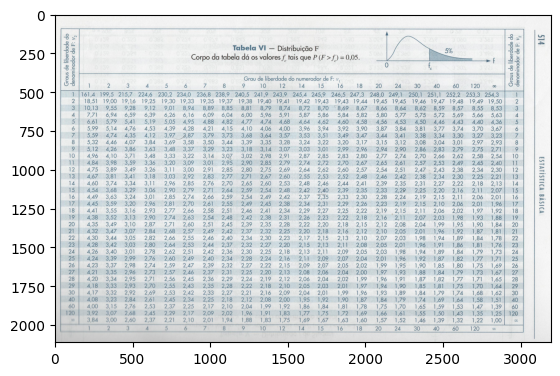

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/drive/My Drive/Dissertacao/Dist F 5%.jpg')
imgplot = plt.imshow(img)
plt.show()